### Clustering con K-means

Divide los datos ek k grupos, k tiene que ser definido a priori.
El método calcula los centroides que formarán parte en la etapa inicial del modelo.
El centroide de los clusters se seguirá actualizando basandonos en las observaciones de los nuevos clusters generados en las siguientes etapas del algoritmo.

**Objetivo**
Encontrar una configuracion de clusters y baricentros que minimice la funcion que tenemos y que minimice para dos puntos cualquiera del mismo cluster la suma de los cuadrados de las distancias.
** Minimiza la distancia intra cluster**

**Metodo:**

1. Se calculan los centroides de los k clusters iniciales
2. Se asigna cada punto del dataset al cluster del centroide que le queda mas cerca y se reconfigura el cluster
3. Recalculamos el baricentro de las observaciones
4. Reasignamos cada punto al centroide que le quede mas cerca,hasta que ninguna de las observaciones sea asignada a un cluster diferente al cual pertenece.


In [70]:
from IPython.display import display, Math, Latex
import numpy as np
from scipy.cluster.vq import vq
from scipy.cluster.vq import kmeans
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn import datasets,metrics
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.spatial.distance import cdist

**Distancia intra cluster**

$SS_{w}(C_{j}) = \sum_{}^{}(x-c_{j})^{2}$

**Distancia intra cluster normalizada**

$SS_{w} = \frac{\sum_{j=1}^{k}(x-c_{j})^{2}}{\sum_{i=1}^{n}(x-\bar{x})^{2} }$

In [3]:
data = np.random.random(90).reshape(30,3)

In [9]:
data

array([[0.45456759, 0.25261725, 0.5082075 ],
       [0.69925584, 0.39173289, 0.43205877],
       [0.72507908, 0.87613186, 0.6971298 ],
       [0.08801953, 0.85326248, 0.42764056],
       [0.37724362, 0.06284198, 0.09113777],
       [0.19103793, 0.93615155, 0.22606997],
       [0.04315678, 0.62900451, 0.22718157],
       [0.94268589, 0.05297814, 0.17326198],
       [0.26471619, 0.94735536, 0.31266187],
       [0.54916623, 0.5957078 , 0.11188971],
       [0.78200835, 0.97982544, 0.10956821],
       [0.57751337, 0.28970738, 0.56356133],
       [0.1248114 , 0.18931589, 0.44226318],
       [0.65599683, 0.00397701, 0.438802  ],
       [0.0764513 , 0.93537151, 0.86117641],
       [0.63387663, 0.6542449 , 0.87357408],
       [0.67380591, 0.89650918, 0.56996728],
       [0.41682663, 0.66452605, 0.30980778],
       [0.57977575, 0.55136933, 0.71975993],
       [0.69574595, 0.93098166, 0.6815126 ],
       [0.86653244, 0.76314751, 0.82450345],
       [0.66160065, 0.55479447, 0.84807101],
       [0.

In [6]:
c1 = np.random.choice(range(len(data)))
c2 = np.random.choice(range(len(data)))
clust_centers = np.vstack([data[c1],data[c2]])
clust_centers

array([[0.36605167, 0.87290747, 0.7982697 ],
       [0.54916623, 0.5957078 , 0.11188971]])

In [8]:
vq(data,clust_centers)

(array([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
        1, 1, 1, 0, 1, 0, 1, 0], dtype=int32),
 array([0.53266108, 0.40821671, 0.37301523, 0.46373888, 0.56029814,
        0.50714393, 0.52004466, 0.67318628, 0.49485078, 0.        ,
        0.44918504, 0.54630309, 0.67407569, 0.68441928, 0.30286529,
        0.35385629, 0.38391627, 0.24783318, 0.39399053, 0.3545464 ,
        0.51304626, 0.43706436, 0.71400171, 0.58687764, 0.50927911,
        0.        , 0.64851904, 0.45437464, 0.54455035, 0.34850616]))

In [11]:
kmeans(data,clust_centers)

(array([[0.4602093 , 0.81260246, 0.56331379],
        [0.58984337, 0.20980588, 0.36641679]]),
 0.3534185114260882)

0.35341 suma de los cuadrados de los errores normalizado

### Ejemplo con vinos

In [15]:
df = pd.read_csv("../datasets/wine/winequality-red.csv",sep=";")

In [17]:
df.shape

(1599, 12)

In [21]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

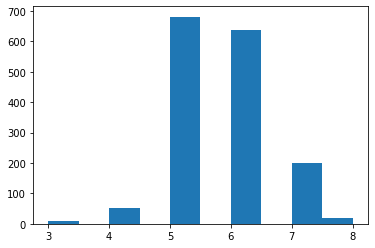

In [20]:
plt.hist(df['quality'])

In [22]:
df.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


##### Normalizacion

In [26]:
df_norm = (df-df.min())/(df.max()-df.min())

In [28]:
df_norm.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.329171,0.279329,0.270976,0.112247,0.125988,0.209506,0.142996,0.490211,0.449695,0.196496,0.311228,0.527205
std,0.154079,0.122644,0.194801,0.096570,0.078573,0.147326,0.116238,0.138571,0.121564,0.101501,0.163949,0.161514
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.221239,0.184932,0.090000,0.068493,0.096828,0.084507,0.056537,0.406021,0.370079,0.131737,0.169231,0.400000
50%,0.292035,0.273973,0.260000,0.089041,0.111853,0.183099,0.113074,0.490455,0.448819,0.173653,0.276923,0.600000
75%,0.407080,0.356164,0.420000,0.116438,0.130217,0.281690,0.197880,0.570117,0.519685,0.239521,0.415385,0.600000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Clustering jerarquico

In [50]:
clus = AgglomerativeClustering(n_clusters=6,linkage="ward").fit(df_norm)
md_h = pd.Series(clus.labels_)

Text(0, 0.5, 'Numero de vinos del cluster')

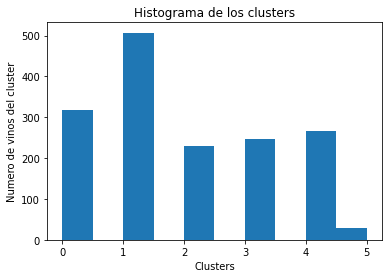

In [51]:
plt.hist(md_h)
plt.title("Histograma de los clusters")
plt.xlabel("Clusters")
plt.ylabel("Numero de vinos del cluster")

In [35]:
clus.children_

array([[   0,    4],
       [ 135,  140],
       [ 750,  751],
       ...,
       [3179, 3191],
       [3192, 3193],
       [3194, 3195]])

In [ ]:
Z = linkage(df_norm,"ward")

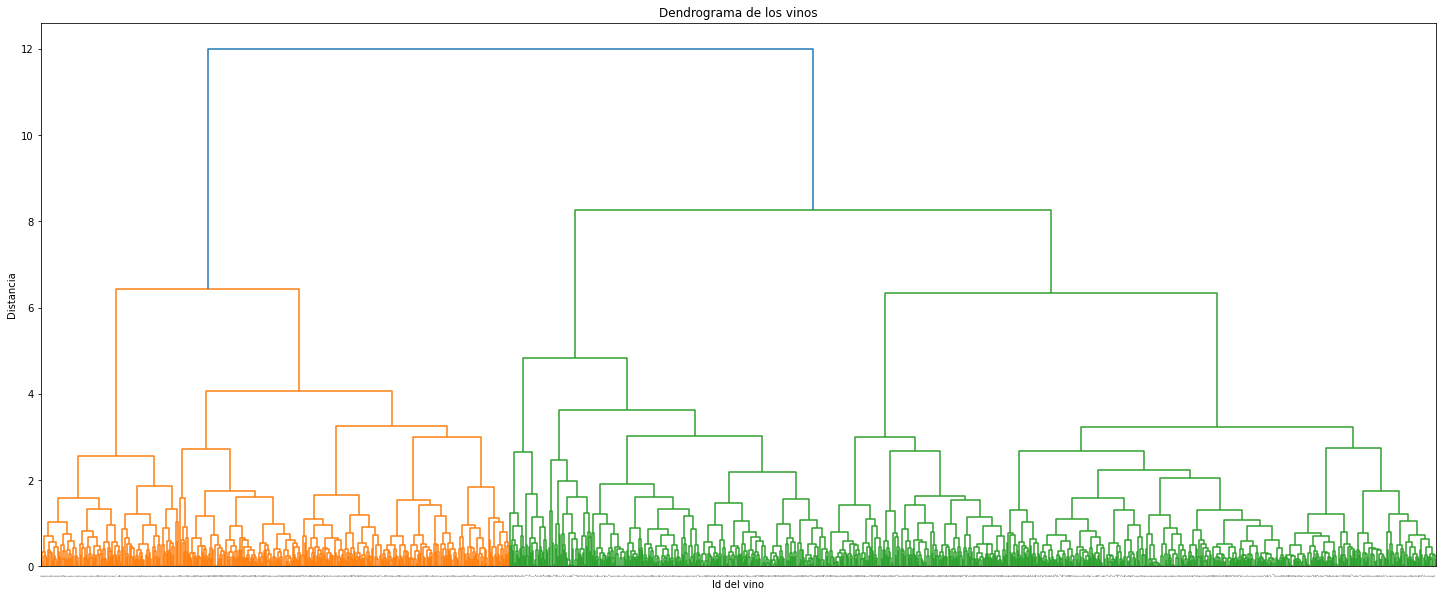

In [42]:
plt.figure(figsize=(25,10))
plt.title("Dendrograma de los vinos")
plt.xlabel("Id del vino")
plt.ylabel("Distancia")
dendrogram(Z,leaf_rotation=90.,leaf_font_size=0.)
plt.show()

In [46]:
model = KMeans(n_clusters = 6)
model.fit(df_norm)

/Users/linatobon/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:890: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6)

In [53]:
md_k = pd.Series(model.labels_)
df_norm['clust_h'] = md_h
df_norm['clust_k'] = md_k

In [54]:
df_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clust_h,clust_k
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,1,1
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4,1,1
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4,1,1
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6,3,0
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,1,1


In [55]:
model.cluster_centers_

array([[0.58281681, 0.20571516, 0.51311741, 0.13426876, 0.13123762,
        0.1391344 , 0.09203016, 0.6563401 , 0.33176066, 0.22262358,
        0.29247379, 0.54736842],
       [0.26456162, 0.35935938, 0.12351085, 0.0913985 , 0.12284774,
        0.14391477, 0.10735219, 0.49237691, 0.48585939, 0.15538154,
        0.21965812, 0.44023669],
       [0.17610619, 0.32432996, 0.08913043, 0.09416319, 0.09608042,
        0.24856093, 0.12292211, 0.32587627, 0.57733653, 0.18516011,
        0.48637681, 0.61043478],
       [0.36379305, 0.15772664, 0.42168539, 0.10422759, 0.10550668,
        0.16162895, 0.08369397, 0.41361019, 0.41974107, 0.23694185,
        0.48326131, 0.69438202],
       [0.31605165, 0.27724649, 0.30314465, 0.15165417, 0.12688338,
        0.38070245, 0.29733093, 0.53861552, 0.43685931, 0.17886868,
        0.21444928, 0.45534591],
       [0.33716814, 0.29223744, 0.48133333, 0.07557078, 0.53789649,
        0.20938967, 0.21071849, 0.5143906 , 0.2335958 , 0.59001996,
        0.16512821,

In [56]:
model.inertia_

186.5514169465971

### Metodo del codo

forma para medir la compacidad de las observacione del cluster,¿que tan compacto es?

- medimos la distancia intra cluster y la distancia al baricentro respectivo 


#### coeficiente de la silueta
cuantifica que tambien  esta unido el punto al resto de puntos del mismo cluster, es decir cuan compacto y cuan alejado se encuentra el punto con respecto al cluster que tiene más cerca


Dado un punto cualquiera del dataset, definimos:
* como de ben el punto está unido respecto al resto de puntos de su cluster
a(i): promedio de las distancias del punto i a cada uno de los otros puntos del mismo cluster
* como de bien esta el punto seprado de lso puntos del cluster vecino mas cercano
b(i): la menor distancia promedio del punto i a cualquier otro cluster que no contenga i (el vecino mas cercano)

$S_{i} = \frac{b_{i}-a_{i}}{max(a_{i},b_{i}) }$

$S_{i}=$
 * $1- \frac{a_{i}}{b_{i}}$ si ${a_{i}}<{b_{i}}$
 * 0 si  ${a_{i}}={b_{i}}$
 * $\frac{b_{i}}{a_{i}} -1$ si ${a_{i}}>{b_{i}}$

* Cuando s(i) tiende a 1, entonces a(i)< b(i) y por tanto el punto esta bien clasificado
* Cuando s(i) tiende a -1, entonces a(i)> b(i) y por tanto el punto estaría mejor en el cluster vecino
* El promedio de s(i) sobre todos los puntos de un cluster nos informa que tan bien agrupados estan los puntos

El promedio de los coeficientes de la silueta de todos los puntos del dataset se puede usar para decidir el numero optimo de clusters:

1. Empezamos con dos clusters y calculamos la silueta de cada cluster

2. Calculamos la silueta promedio de todo el dataset

3. Si la silueta promedio de algun cluster es muy inferior al promedio global, el numero de clusters es suboptimo y debemos agregar uno mas

4. Repetimos los pasos 1 a 3 para diferentes numeros de clusters hasta alcanzar un valor optimo segun el contexto o siluetas similares

5. Decidimos el candidato potencial en funcion de los resultados obtenidos

In [60]:
x1 = np.array([3,1,1,2,1,6,6,6,5,6,7,8,9,8,9,9,8])
x2 = np.array([5,4,5,6,5,8,6,7,6,7,1,2,1,2,3,2,3])

X = np.array(list(zip(x1,x2))).reshape(len(x1),2)

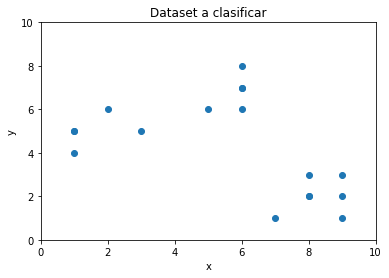

In [64]:
plt.plot()
plt.xlim([0,10])
plt.ylim([0,10])
plt.title("Dataset a clasificar")
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(x1,x2)
plt.show()

In [71]:
max_k =10 # max numb de clusters
K = range(1,max_k)
ssv = []
# generar un color por cluster
color_palette = [plt.cm.Spectral(float(i)/max_k) for i in K]
centroid = [sum(X)/len(X) for i in K]
# suma de los cuadrados totales
sst = sum(np.min(cdist(X,centroid,"euclidean"),axis =1))

# para cada cluster
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    centers = pd.DataFrame(kmeanModel.cluster_centers_)
    labels = kmeanModel.labels_
    # suma de distancias al baricentro
    saw_k = sum(np.min(cdist(X,kmeanModel.cluster_centers_,"euclidean"),axis=1))
    ssv.append(saw_k)
    label_color = [color_palette[i] for i in labels]